### Conda Env

In [ ]:
#!conda --version

!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:34
🔁 Restarting kernel...


In [ ]:
#!conda --version
!conda install geopandas
!conda install libgcc

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-21.2.0               |     pyhd8ed1ab_0          44 KB  conda-forge
    boost-cpp-1.74.0           |       h312852a_4        16.3 MB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008     

### Load Packages

In [1]:
# Link to Drive
from google.colab import drive
drive.mount('/content/drive')

# Connect to Earth Engine
import ee
ee.Authenticate()
ee.Initialize()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=jiNHT-gl0c6EYX4Tt5plp8U-c2Px2hklCSkQlugBEmI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWg30GqGFieIQ65rVJ-9zrDW8Q3cLEOB7aknEXXMNyt9earYg7nRIA0

Successfully saved authorization token.


In [2]:
import os
from glob import glob
!pip install shapely
!pip install geopandas
import shapely as shp
import geopandas as gpd

## Add "Country" to Polygons of Ponds

In [ ]:
os.chdir('/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019')
os.getcwd()

'/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019'

In [ ]:
path_parcel = glob(os.path.join(os.getcwd(), 'Coastline_parcels_polygon', '*.gpkg'))
path_pond = glob(os.path.join(os.getcwd(), 'Aquaculture_ponds_Asian_coast_2019', '*.gpkg'))
print(path_parcel, '\n', path_pond)

['/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019/Coastline_parcels_polygon/Coastline_parcels.gpkg'] 
 ['/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019/Aquaculture_ponds_Asian_coast_2019/Asia_aquaculture_ponds_2019.gpkg', '/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019/Aquaculture_ponds_Asian_coast_2019/ponds_attributed.gpkg']


In [ ]:
parcel = gpd.read_file(path_parcel[0])
parcel = parcel.to_crs(4326)
pond = gpd.read_file(path_pond[0])
print("parcel crs is ", parcel.crs)
print("pond crs is ", pond.crs)

parcel crs is  epsg:4326
pond crs is  epsg:4326


In [ ]:
# Spatial Join
inter = gpd.sjoin(pond, parcel, op='intersects', how='inner')
inter.info()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3666329 entries, 0 to 3662765
Data columns (total 19 columns):
 #   Column       Dtype   
---  ------       -----   
 0   id           int64   
 1   geometry     geometry
 2   index_right  int64   
 3   Join_Count   int64   
 4   TARGET_FID   int64   
 5   OBJECTID     int64   
 6   FID_1        float64 
 7   Shape_Leng   float64 
 8   DSAS_date    object  
 9   DSAS_uncy    float64 
 10  DSAS_type    object  
 11  DSAS_ID      int64   
 12  DSAS_group   int64   
 13  DSAS_searc   float64 
 14  BUFF_DIST    float64 
 15  GID_0        object  
 16  NAME_0       object  
 17  Shape_Le_1   float64 
 18  Shape_Area   float64 
dtypes: float64(7), geometry(1), int64(7), object(4)
memory usage: 559.4+ MB


In [ ]:
print(pond.shape)
print(inter.shape)

(3663844, 2)
(3666329, 19)


* Clean-up the attributes before exporting

In [ ]:
# Export attributed ponds by country
#for i in countries:
#  output = inter[inter['NAME_0'] == i]
#  output.to_file(os.path.join(os.getcwd(), 'Aquaculture_ponds_Asian_coast_2019', 'pond_2019_'+i+'.gpkg'))

In [ ]:
#inter.to_file(os.path.join(os.getcwd(), 'Aquaculture_ponds_Asian_coast_2019','ponds_2019_attributed.gpkg'),
#              driver="GPKG")

## User-defined Functions

In [3]:
# Get border coords as input to GEE, Using list comprehension
def getBorder(polygon):
  x,y = polygon.exterior.coords.xy
  border = [[lon, lat] for lon, lat in zip(x,y)]
  return border

# Usual For-loop
#border = []
#for i in range(len(roi_merged)):
#  x,y = roi_merged[i].exterior.coords.xy
#  border.append([[lon,lat] for lon, lat in zip(x,y)])
#border[1]

In [4]:
# Function to Mask Clouds
def maskCloud(image):
  cloudMask = image.select(['pixel_qa']).bitwiseAnd(1<<5).eq(0)
  cloudShadowMask = image.select(['pixel_qa']).bitwiseAnd(1<<3).eq(0)
  final_mask = cloudMask.And(cloudShadowMask)
  return image.updateMask(final_mask)

In [5]:
# Function for Smoothing
def smooth(image):
  kernel = ee.Kernel.square(radius = 10, units = 'meters', normalize = True)
  return image.convolve(kernel)

In [6]:
def addNDWI(image):
  ndwi = image.normalizedDifference(['B2', 'B4']).rename(['ndwi'])
  return image.addBands(ndwi)


In [7]:
def filterPercentiles(image):
  
  boolean = image.lt(P_95_ndwi).And(image.gt(P_05_ndwi))
  # Make a boolean showing if image meets conditions
  boolMask = boolean.selfMask()
  # Create a mask from boolean

  return image.updateMask(boolMask)
  # Apply mask to image

In [8]:
def quantile(year):

  # Subset to one year
  ls_oneyear = ls_ndwi.filter(ee.Filter.calendarRange(year, year, 'year'))

  # Get Quantile of one year
  P_95_ndwi = ls_oneyear.reduce(ee.Reducer.percentile([97.5])).select('ndwi_p98')
  P_05_ndwi = ls_oneyear.reduce(ee.Reducer.percentile([2.5])).select('ndwi_p3')

  #######################################################
  def filterPercentiles(image):
  
    boolean = image.lt(P_95_ndwi).And(image.gt(P_05_ndwi))
    # Make a boolean showing if image meets conditions
    boolMask = boolean.selfMask()
    # Create a mask from boolean

    return image.updateMask(boolMask)
    # Apply mask to image
  ########################################################

  # Update each image in one year stack with the quantiles
  ls_quantiled = ls_oneyear.map(filterPercentiles)

  # Reduce to Min.
  ls_reduced = ls_quantiled.min().set({'year':year, 'system:time_start':ee.Date.fromYMD(year,12,31)})

  return ls_reduced

In [9]:
# Function of ostu's method
def otsu(histogram):
    counts = ee.Array(ee.Dictionary(histogram).get('histogram'))
    means = ee.Array(ee.Dictionary(histogram).get('bucketMeans'))
    size = means.length().get([0])
    total = counts.reduce(ee.Reducer.sum(), [0]).get([0])
    sum = means.multiply(counts).reduce(ee.Reducer.sum(), [0]).get([0])
    mean = sum.divide(total)

    indices = ee.List.sequence(1, size)

    def iFunc(i):
      aCounts = counts.slice(0, 0, i) 
      aCount = aCounts.reduce(ee.Reducer.sum(), [0]).get([0])
      aMeans = means.slice(0, 0, i)
      aMean = aMeans.multiply(aCounts).reduce(ee.Reducer.sum(),[0]).get([0]).divide(aCount)
      bCount = total.subtract(aCount)
      bMean = sum.subtract(aCount.multiply(aMean)).divide(bCount)
      return aCount.multiply(aMean.subtract(mean).pow(2)) \
            .add(bCount.multiply(bMean.subtract(mean).pow(2)))

    # Compute between sum of squares, where each mean partitions the data
    bss = indices.map(iFunc)

    return means.sort(bss).get([-1])

In [10]:
# Function of Otsu's Method
def thresholding(image):
  band = 'ndwi'

  #Compute the histogram of the NIR band. (the mean and variance are only FYI)
  histogram = image.select([band]).reduceRegion(
      reducer = ee.Reducer.histogram(255,2).combine('mean', None, True).combine('variance', None, True),
      geometry = roi.getInfo(),
      scale = 30,
      bestEffort = True)
  
  threshold = otsu(histogram.get(band+'_histogram'))
  water = image.select([band]).lt(threshold)
  return water.rename(['watermask']) \
              .clip(roi) \
              .copyProperties(image) \
              .set('system:time_start', ee.Date.fromYMD(image.get('year'), 12, 31))

In [11]:
def ndwiThreshold(image):
  BAND = 'ndwi'
  return image.select([BAND]).gte(0.3) \
              .rename(['watermask'])\
              .clip(roi) \
              .copyProperties(image) \
              .set('system:time_start', ee.Date.fromYMD(image.get('year'), 12, 31))

In [12]:
# Function to have difference between two years
def annual_diff(list):
  diff = ee.Image(ee.List(list).get(1)).subtract(
      ee.Image(ee.List(list).get(0))
  )
  return diff.set({'year': ee.Image(ee.List(list).get(1)).get('year'),
                   'system:time_start': ee.Image(ee.List(list).get(1)).get('system:time_start')})

In [13]:
# Function for remapping
def remap_gain(image):
  gain = image.eq(1).selfMask()
  return gain.remap([1], ee.List([image.get('year')])) \
             .rename('gain_year') \
             .copyProperties(image)

In [14]:
# Function for unite pixel type
def unipt(image):
  return image.cast({'gain_year': ee.PixelType('int', 1984, 2019)})             

In [15]:
# Function to Visualize
import folium

# Define the URL format used for Earth Engine generated map tiles.
EE_TILES = 'https://earthengine.googleapis.com/map/{mapid}/{{z}}/{{x}}/{{y}}?token={token}'
print('Folium version: ' + folium.__version__)


# Mapdisplay: Display GEE objects using folium.
def Mapdisplay(center, dicc, Tiles="OpensTreetMap",zoom_start=10):
    '''
    :param center: Center of the map (Latitude and Longitude).
    :param dicc: Earth Engine Geometries or Tiles dictionary
    :param Tiles: Mapbox Bright,Mapbox Control Room,Stamen Terrain,Stamen Toner,stamenwatercolor,cartodbpositron.
    :zoom_start: Initial zoom level for the map.
    :return: A folium.Map object.
    '''
    mapViz = folium.Map(location=center,tiles=Tiles, zoom_start=zoom_start)
    for k,v in dicc.items():
      if ee.image.Image in [type(x) for x in v.values()]:
        folium.TileLayer(
            tiles = v["tile_fetcher"].url_format,
            attr  = 'Google Earth Engine',
            overlay =True,
            name  = k
          ).add_to(mapViz)
      else:
        folium.GeoJson(
        data = v,
        name = k
          ).add_to(mapViz)
    mapViz.add_child(folium.LayerControl())
    return mapViz

Folium version: 0.8.3


## Prepare ROI (Asia) for processing

In [16]:
os.chdir('/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019/Coastline_parcels_polygon')
os.getcwd()

'/content/drive/MyDrive/THESIS_AQUAPONDS/ROI/Aquaculture_Asia_Coast_2019/Coastline_parcels_polygon'

In [17]:
# Load ROI
path_parcel = glob(os.path.join(os.getcwd(), '*.gpkg'))
#print(path_parcel)

parcel = gpd.read_file(path_parcel[0])

# Reproject to 4326
parcel = parcel.to_crs(4326)
print(parcel.crs)

epsg:4326


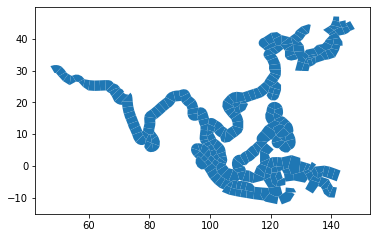

In [18]:
parcel.plot()

In [19]:
parcel_multipoly = parcel['geometry']

# Make a list of polygons out of twice nested multipolygons
parcel_poly = [list(i) for i in parcel_multipoly]
# Flatten the list
parcel_poly = [item for sublist in parcel_poly for item in sublist]
parcel_poly[:5]

In [20]:
parcel_borders = [getBorder(i) for i in parcel_poly]
len(parcel_borders)

261

In [21]:
#ROI = ee.Geometry.MultiPolygon(coords = borders)

## Start Precessing in GEE (roi:Asia)

In [55]:
# Define Study Area
roi = ee.Geometry.MultiPolygon(coords = parcel_borders[1])
#roi.getInfo()

In [56]:
# Load Satellitie Archive
ls7 = ee.ImageCollection("LANDSAT/LE07/C01/T1_SR") \
      .filterDate('1999', '2020') \
      .filterBounds(roi).sort("system:time_start", True)
ls5 = ee.ImageCollection("LANDSAT/LT05/C01/T1_SR") \
      .filterDate('1984', '2013') \
      .filterBounds(roi).sort("system:time_start", True)
ls4 = ee.ImageCollection("LANDSAT/LT04/C01/T1_SR") \
      .filterDate('1984', '1994') \
      .filterBounds(roi).sort("system:time_start", True)

ls_all = ls7.merge(ls5).merge(ls4) \
        .sort('system:time_start', True)\
        .map(maskCloud) \
        .map(smooth)
print(ls_all.size().getInfo())

4344


* Add NDWI, Subset to NDWI; 

In [57]:
ls_all = ls_all.map(addNDWI)
ls_ndwi = ls_all.select(['ndwi'])
print(ls_ndwi.size().getInfo())

4344


* Group by year, Reduce to annual minimum with 95% quantile applied <br>
https://stackoverflow.com/questions/64311694/google-earth-engine-remove-value-from-s2-ndvi-image-collection-5-and-95-perce


In [58]:
years = ee.List.sequence(1984, 2019)

ls_Treduced = ee.ImageCollection.fromImages(years.map(quantile))

print(ls_Treduced.size().getInfo())
ls_Treduced.first().getInfo()

36


{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 1,
    'min': -1,
    'precision': 'float',
    'type': 'PixelType'},
   'id': 'ndwi'}],
 'properties': {'system:index': '0',
  'system:time_start': {'type': 'Date', 'value': 473299200000},
  'year': 1984},
 'type': 'Image'}

* (debugged) Filter out the years where no data are available

In [59]:
# Add "bandlength" as new property
ls_Treduced = ls_Treduced.map(lambda image: image.set('bandlength', image.bandNames().size()))
# Filter out the years where no data are available
ls_Treduced = ls_Treduced.filterMetadata('bandlength', 'not_equals', 0)
print(ls_Treduced.size().getInfo())

36


* Water Mask with Otsu's Method

In [60]:
ls_wmsk = ls_Treduced.map(thresholding)
#ls_wmsk = ls_Treduced.map(ndwiThreshold)

print(ls_wmsk.size().getInfo())
ls_wmsk.first().getInfo()

36


{'bands': [{'crs': 'EPSG:4326',
   'crs_transform': [1, 0, 0, 0, 1, 0],
   'data_type': {'max': 1, 'min': 0, 'precision': 'int', 'type': 'PixelType'},
   'dimensions': [4, 3],
   'id': 'watermask',
   'origin': [142, 43]}],
 'properties': {'bandlength': 1,
  'system:footprint': {'coordinates': [[[143.482548020828, 43.51239541499606],
     [145.36743589719873, 43.878183493158254],
     [144.736086653691, 44.86793386678762],
     [144.66971795808024, 45.8241965993063],
     [142.55864003609787, 45.36128785555753],
     [143.482548020828, 43.51239541499606]]],
   'type': 'Polygon'},
  'system:index': '0',
  'system:time_start': {'type': 'Date', 'value': 473299200000},
  'year': 1984},
 'type': 'Image'}

* Yearly Step (Iteration)

In [67]:
list_wmsk = ls_wmsk.toList(ls_wmsk.size())

# Calculate "Backward Gradient", i.e. (Tn+1 - Tn)
ls_grad = list_wmsk.slice(0) \
          .zip(list_wmsk.slice(1)) \
          .map(annual_diff)

ls_84 = ee.List([ls_wmsk.first()])

list_footprint = ls_84.cat(ls_grad) 

ls_footprint = ee.ImageCollection.fromImages(list_footprint)        
print(ls_footprint.size().getInfo())

36


* Remap

In [68]:
# Remap value "1" (ponds gain) to "year" of that gain
ls_gain = ls_footprint.select(['watermask']).map(remap_gain).map(unipt)
#print(ls_gain.size().getInfo())

* Mosaic 

In [69]:
fishpond_Gain = ls_gain.mosaic().cast({'gain_year': ee.PixelType('int', 1984, 2019)})
#print(fishpond_Gain.getInfo())

In [70]:
fishpond_Gain_id = fishpond_Gain.getMapId({'min': 1984, 'max': 2019, 
                             'palette': ['#ebf5fb', '#d6eaf8', '#aed6f1', '#85c1e9', '#5dade2', '#3498db', '#2e86c1', '#2874a6', '#21618c', '#1b4f72']})
center = [37.18, 118.8]
Mapdisplay(center, {'Footprint Gain': fishpond_Gain_id}, zoom_start = 3)

## ee.Image => numpy array? xarray?

## Attach Attributes? (maybe by matching centroid of raster image and centroid of polygon...)


In [ ]:
! pip install rioxarray

     |████████████████████████████████| 46 kB 1.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.3 MB/s 
  Created wheel for rioxarray: filename=rioxarray-0.7.1-py3-none-any.whl size=54118 sha256=b7377ba3283f4c851181c3e003a11064f6f8c3145ddcdbea5b130408b5479de2
  Stored in directory: /root/.cache/pip/wheels/42/9b/1c/acf2904f7ee44be3c0b8ffc7ea4fafebb135aee00242bef86f
Successfully built rioxarray


In [ ]:
import rioxarray as rio

In [ ]:
ee_jpn = test[1]
roi_jpn = ee.Geometry.Polygon(coords = borders[1])

In [ ]:
# https://gis.stackexchange.com/questions/350771/earth-engine-simplest-way-to-move-from-ee-image-to-array-for-use-in-sklearn
arr_jpn = ee_jpn.sampleRectangle(region = roi_jpn)

In [ ]:
arr_jpn = np.array(arr_jpn.get('gain_year').getInfo())

EEException: ignored

## Deposed

In [37]:
year = 2001

# Subset to one year
ls_oneyear = ls_ndwi.filter(ee.Filter.calendarRange(year, year, 'year'))
print(ls_oneyear.size().getInfo())

# Get Quantile of one year
P_95_ndwi = ls_oneyear.reduce(ee.Reducer.percentile([95])).select('ndwi_p95')
P_05_ndwi = ls_oneyear.reduce(ee.Reducer.percentile([5])).select('ndwi_p5')
print(P_05_ndwi.getInfo())

# Update each image in one year stack with the quantiles
ls_quantiled = ls_oneyear.map(filterPercentiles)
print(ls_quantiled.size().getInfo())

# Reduce to Min.
ls_reduced = ls_quantiled.min().set({'year':year, 'system:time_start':ee.Date.fromYMD(year,12,31)})
print(ls_reduced.getInfo())

177
{'type': 'Image', 'bands': [{'id': 'ndwi_p5', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -1, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}]}
177
{'type': 'Image', 'bands': [{'id': 'ndwi', 'data_type': {'type': 'PixelType', 'precision': 'float', 'min': -1, 'max': 1}, 'crs': 'EPSG:4326', 'crs_transform': [1, 0, 0, 0, 1, 0]}], 'properties': {'system:time_start': {'type': 'Date', 'value': 1009756800000}, 'year': 2001}}


In [ ]:
#years = range(1984, 2020)

# Subset to one year
#ls_oneyear = [ls_ndwi.filter(ee.Filter.calendarRange(year, year, 'year')) for year in years]

# Get Quantile of one year
#P_95_ndwi = [imgc.reduce(ee.Reducer.percentile([95])).select('ndwi_p95') for imgc in ls_oneyear]
#P_05_ndwi = [imgc.reduce(ee.Reducer.percentile([5])).select('ndwi_p5') for imgc in ls_oneyear]

# Update each image in one year stack with the quantiles
#ls_quantiled = [imgc.map(filterPercentiles) for imgc in ls_oneyear]
#ls_quantiled = [imgc.map(filterPercentiles) for imgc, p95, p05 in zip(ls_oneyear, P_95_ndwi, P_05_ndwi)]

# Reduce to Min.
#ls_reduced = [imgc.min() for imgc in ls_quantiled]

#ls_reduced = [img.set({'year':year, 'system:time_start':ee.Date.fromYMD(year,12,31)}) for img, year in zip(ls_reduced, years)]

#ls_Treduced = ee.ImageCollection.fromImages(ls_reduced)

* Reduce ImageCollection, Group by YEAR

In [ ]:
years = ee.List.sequence(1984, 2019)
ls_Treduced = ee.ImageCollection.fromImages(
    years.map(lambda YEAR: ls_quantiled.filter(ee.Filter.calendarRange(YEAR, YEAR, 'year')) \
              .min().clip(roi).set({'year': YEAR, 'system:time_start': ee.Date.fromYMD(YEAR, 12, 31)}))
)
print(ls_Treduced.size().getInfo())